In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_images(img1 , img2 , title1="" , title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1 , cmap="gray")
    ax1.set(xticks=[], yticks=[] , title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2 , cmap="gray")
    ax2.set(xticks=[], yticks=[] , title=title2)

In [3]:
path = "car_1.jpg"

In [4]:
image = cv2.imread(path)

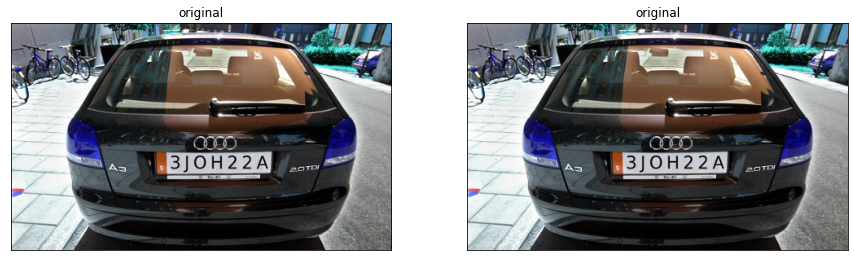

In [5]:
plot_images(image , image , title1 ="original" ,title2="original")

In [6]:
gray = cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)

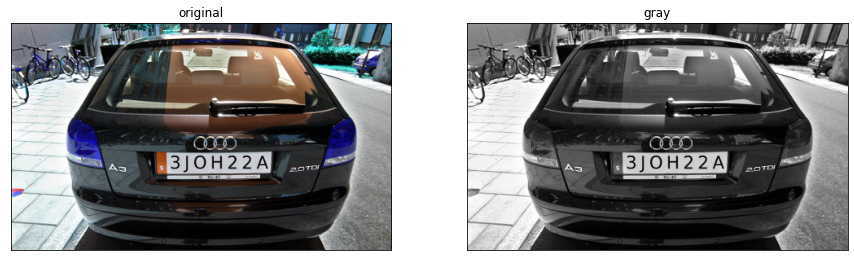

In [7]:
plot_images(image , gray , title1 ="original" ,title2="gray")

In [8]:
blur = cv2.bilateralFilter(gray ,11 , 90 ,90)

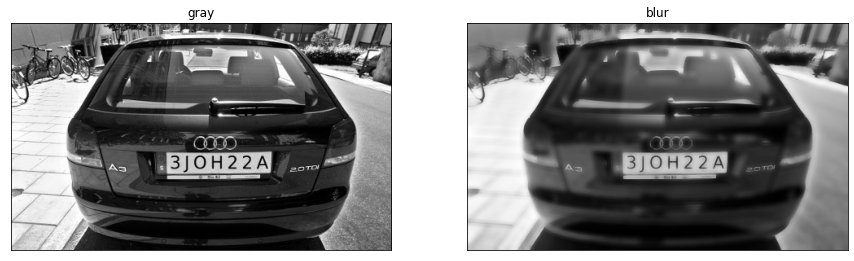

In [9]:
plot_images(gray , blur , title1 ="gray" ,title2="blur")

In [10]:
edges = cv2.Canny(blur ,30 ,200)

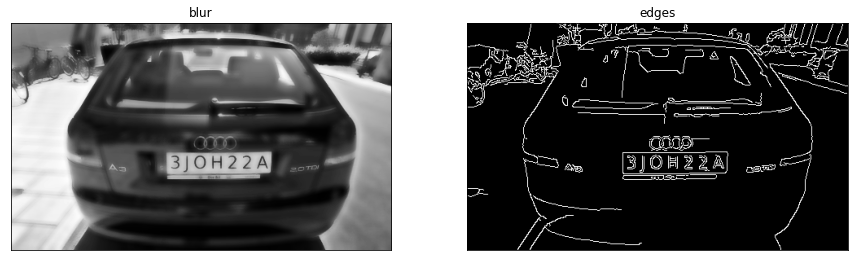

In [11]:
plot_images(blur ,edges , title1 ="blur" ,title2="edges")

In [12]:
cnts ,new =cv2.findContours(edges.copy(),cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
image_copy = image.copy()

In [14]:
_ = cv2.drawContours(image_copy , cnts ,-1 ,(255,0,255) , 2)

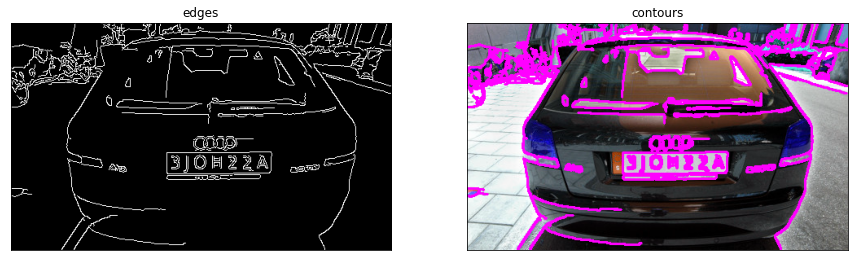

In [15]:
plot_images(edges ,image_copy , title1 ="edges" ,title2="contours")

In [16]:
print(len(cnts))

194


In [17]:
print(cnts)

[array([[[ 88, 240]],

       [[ 86, 242]],

       [[ 86, 243]],

       [[ 83, 246]],

       [[ 83, 247]],

       [[ 81, 249]],

       [[ 81, 250]],

       [[ 79, 252]],

       [[ 79, 253]],

       [[ 77, 255]],

       [[ 77, 256]],

       [[ 75, 258]],

       [[ 75, 259]],

       [[ 73, 261]],

       [[ 73, 262]],

       [[ 71, 264]],

       [[ 71, 265]],

       [[ 69, 267]],

       [[ 69, 268]],

       [[ 67, 270]],

       [[ 67, 271]],

       [[ 65, 273]],

       [[ 65, 274]],

       [[ 63, 276]],

       [[ 63, 277]],

       [[ 62, 278]],

       [[ 62, 279]],

       [[ 63, 278]],

       [[ 63, 277]],

       [[ 65, 275]],

       [[ 65, 274]],

       [[ 67, 272]],

       [[ 67, 271]],

       [[ 69, 269]],

       [[ 69, 268]],

       [[ 71, 266]],

       [[ 71, 265]],

       [[ 73, 263]],

       [[ 73, 262]],

       [[ 75, 260]],

       [[ 75, 259]],

       [[ 77, 257]],

       [[ 77, 256]],

       [[ 79, 254]],

       [[ 79, 253]],

       [[

In [18]:
cnts = sorted(cnts , key=cv2.contourArea, reverse=True)[:10]

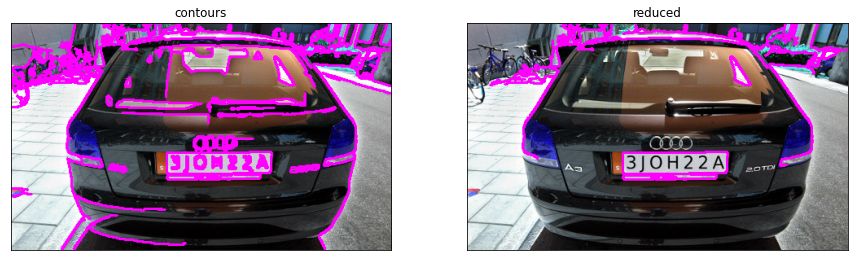

In [19]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts , cnts ,-1 ,(255,0,255) , 2)
plot_images(image_copy ,image_reduced_cnts , title1 ="contours" ,title2="reduced")

In [20]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c , True)
    edges_count = cv2.approxPolyDP(c ,0.02* perimeter, True)
    if len(edges_count) ==4:
        print("check")
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h , x:x+w]
        break
    
cv2.imwrite("plate.png" , plate) 

check


True

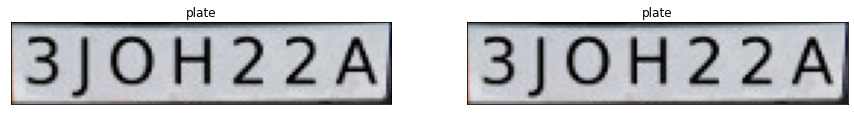

In [21]:
plot_images(plate ,plate , title1 ="plate" ,title2="plate")

In [28]:
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Users\user\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
text = tess.pytesseract.image_to_string(plate, lang="eng")

In [29]:
print(text)

3JOH22A
